<a href="https://colab.research.google.com/github/rish4/SIFT-features/blob/master/SIFT_Features2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print (cv2.__version__)

# I cropped out each stereo image into its own file.
# You'll have to download the images to run this for yourself
#octo_front = cv2.imread('../../images/Octopus_Far_Front.jpg')
#octo_offset = cv2.imread('../../images/Octopus_Far_Offset.jpg')

polyp=cv2.imread('/content/drive/My Drive/Dataset-5/Test set/Unhealthy/00a98927-bbfc-405a-9060-b5e7ccf6b811.jpg')
polyp2=cv2.imread('/content/drive/My Drive/Dataset-5/Test set/Unhealthy/00e301cd-5438-4ed7-846b-7d8eaa7cf4b8.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))
    

3.4.2


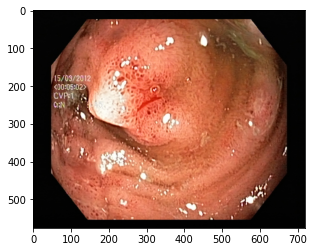

In [6]:
show_rgb_img(polyp);

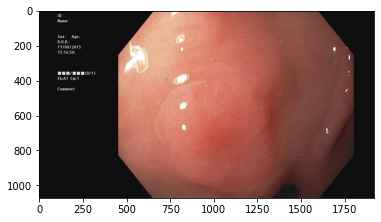

In [7]:
show_rgb_img(polyp2)

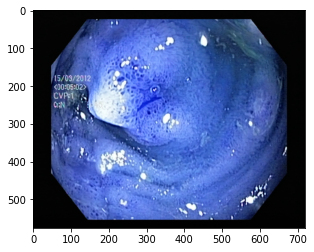

In [8]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

polyp_gray = to_gray(polyp)
polyp2_gray = to_gray(polyp2)

plt.imshow(polyp, cmap='gray');

In [ ]:
show

In [16]:
#pip install opencv-python==3.4.2.16

     |████████████████████████████████| 25.0MB 64.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [17]:
#pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 148kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


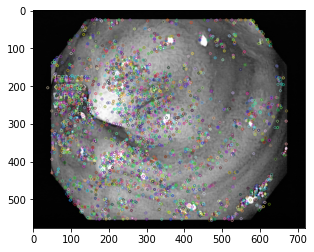

In [9]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(polyp_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(polyp2_gray)

#print 'Here are what our SIFT features look like for the front-view octopus image:'
show_sift_features(polyp_gray,polyp, octo_front_kp);

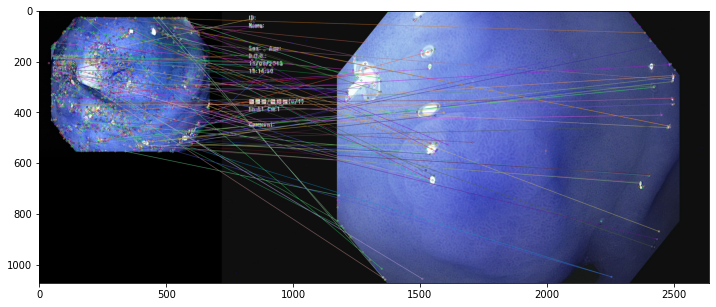

In [11]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    polyp, octo_front_kp,
    polyp2, octo_offset_kp,
    matches[:N_MATCHES], polyp2.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);